In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from pandas_profiling import ProfileReport


/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_20/2741434953.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

## Logistic Regression

In [2]:
df_log = pd.read_csv('/kaggle/input/logistic-regression/Social_Network_Ads.csv')
df_log

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
profile = ProfileReport(df_log,title = 'Social_Network_ads')
profile.to_file('Social_Network_ads.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


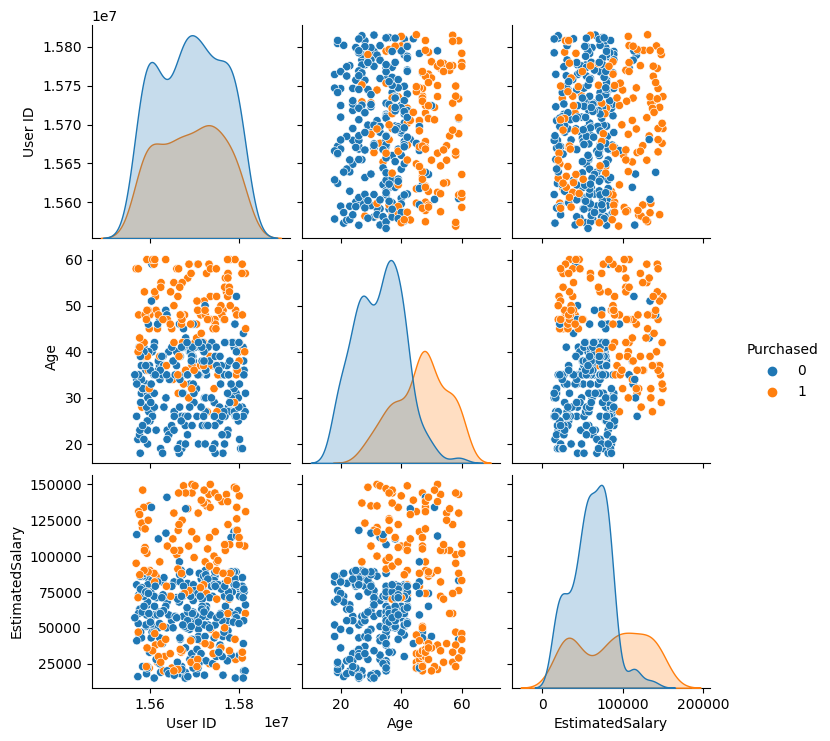

In [4]:
sns.pairplot(df_log,hue = 'Purchased')

In [5]:
def encode(df):
  s = (df.dtypes == 'object')
  cat_col = list(s[s].index)
  for i in cat_col:
    lb = LabelEncoder()
    df[i] = lb.fit_transform(df[i])
  return df

In [6]:
df_log = encode(df_log)
df_log

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [7]:
x,y = df_log.drop('Purchased',axis = 1),df_log['Purchased']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
scale = StandardScaler()
x_train_sc = scale.fit_transform(x_train)
x_test_sc = scale.fit_transform(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log = LogisticRegression()
log.fit(x_train_sc,y_train)

LogisticRegression()

In [12]:
log.score(x_train_sc,y_train)

0.83

In [13]:
log.score(x_test_sc,y_test)

0.86

In [14]:
print(classification_report(y_train,log.predict(x_train_sc)))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       194
           1       0.82      0.66      0.73       106

    accuracy                           0.83       300
   macro avg       0.83      0.79      0.80       300
weighted avg       0.83      0.83      0.83       300



In [15]:
K_fold = KFold(n_splits=8,shuffle = True, random_state=42)
score = cross_val_score(log,x_train_sc,y_train,cv = K_fold,scoring = 'accuracy')

In [16]:
print(np.mean(score))

0.8174786628733997
